This is to analyze the google trends data and its correlation with the hip-pop lyrics mentions

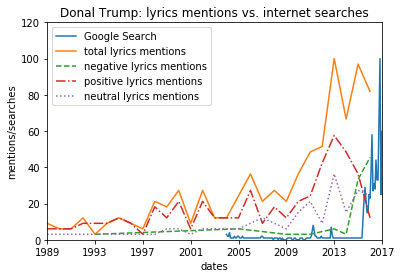

In [20]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date


list_time = []
list_search = []
with open('GoogleTrends_DTrump.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump

with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions

df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Donald Trump'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])

#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Donal Trump: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Donald Trump comparison plot.png')

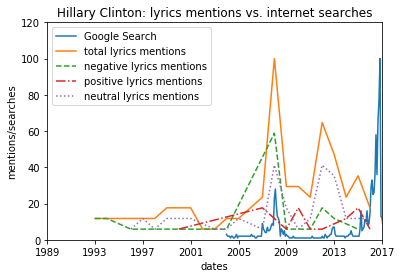

In [25]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_HClinton.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
list_year = []
list_mention = []
with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions
list_year = [i['album_release_date'] for i in list_data]
list_mentions = [i['candidate'] for i in list_data]
df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Hillary Clinton: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Hillary Clinton comparison plot.png')

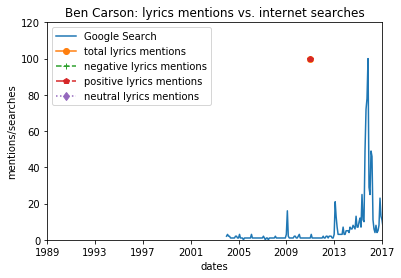

In [21]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_BCarson.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
list_year = []
list_mention = []
with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions
list_year = [i['album_release_date'] for i in list_data]
list_mentions = [i['candidate'] for i in list_data]
df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Ben Carson'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Ben Carson']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Ben Carson']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Ben Carson']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions',marker='o')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', marker='+', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', marker='p', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', marker='d', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Ben Carson: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Ben Carson comparison plot.png')

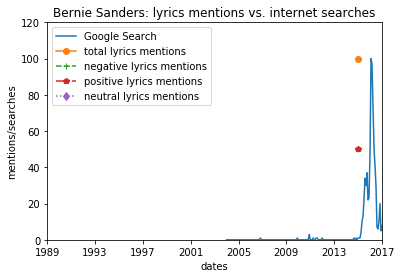

In [22]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_BSanders.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
list_year = []
list_mention = []
with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions
list_year = [i['album_release_date'] for i in list_data]
list_mentions = [i['candidate'] for i in list_data]
df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Bernie Sanders'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Bernie Sanders']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Bernie Sanders']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Bernie Sanders']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()

df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions',marker='o')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', marker='+', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', marker='p', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', marker='d', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Bernie Sanders: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Bernie Sanders comparison plot.png')

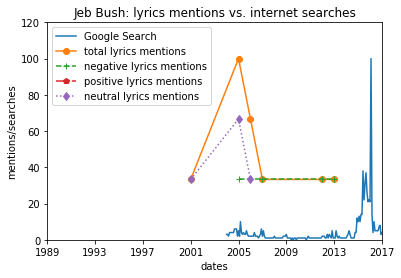

In [26]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_JBush.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
list_year = []
list_mention = []
with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions
list_year = [i['album_release_date'] for i in list_data]
list_mentions = [i['candidate'] for i in list_data]
df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Jeb Bush'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions',marker='o')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', marker='+', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', marker='p', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', marker='d', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Jeb Bush: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Jeb Bush comparison plot.png')

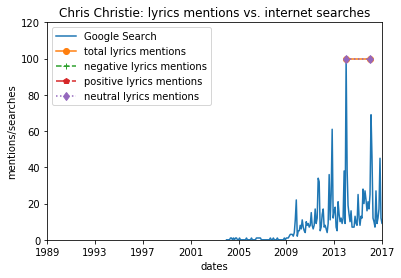

In [24]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_CChristie.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
list_year = []
list_mention = []
with open('HipHopLyrics.csv','rt',encoding='utf-8') as CSVread:
    has_header = csv.Sniffer().has_header(CSVread.read(1024))
    CSVread.seek(0)
    CSV_read1 = csv.DictReader(CSVread,fieldnames=['id','candidate','song'
                                                  ,'artist','sentiment',
                                                  'theme','album_release_date',
                                                  'line','url']) 
    if has_header:
        next(CSV_read1)
    list_data = [dict(row) for row in CSV_read1]
# total mentions
list_year = [i['album_release_date'] for i in list_data]
list_mentions = [i['candidate'] for i in list_data]
df_lyrics = pd.DataFrame(list_data)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Chris Christie'].groupby('album_release_date').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['album_release_date'] = pd.to_datetime(df_lyrics1['album_release_date'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Chris Christie']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('album_release_date').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['album_release_date'] = pd.to_datetime(df_lyrics2['album_release_date'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Chris Christie']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('album_release_date').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['album_release_date'] = pd.to_datetime(df_lyrics3['album_release_date'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Chris Christie']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('album_release_date').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['album_release_date'] = pd.to_datetime(df_lyrics4['album_release_date'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['album_release_date'],df_lyrics1['count'],label='total lyrics mentions',marker='o')
plot1 = plt.plot(df_lyrics2['album_release_date'],df_lyrics2['count'],label='negative lyrics mentions', marker='+', linestyle='--')
plot1 = plt.plot(df_lyrics3['album_release_date'],df_lyrics3['count'],label='positive lyrics mentions', marker='p', linestyle='-.')
plot1 = plt.plot(df_lyrics4['album_release_date'],df_lyrics4['count'],label='neutral lyrics mentions', marker='d', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Chris Christie: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Chris Christie comparison plot.png')